#### Data Source Information
https://www.sciencedirect.com/science/article/pii/S2352340922008605

https://www.openicpsr.org/openicpsr/project/178881/version/V1/view

---
#### Libraries 

In [ ]:
import numpy as np
import pandas as pd

---
#### Input

In [2]:
si_df=pd.read_csv("D:\SP\GitHub\P1\spanis_ insurance.csv")

In [3]:
si_df.shape

(76102, 15)

In [4]:
si_df.head()

,ID,Gender,Birth_Date,Effecitive_Date,Capital,Renewal_Date,Age,t,Age_Actuarial,Birthday,x,r,s,Age_actuarial_quarter,Month
0,1,M,10-07-1960,08-03-2000,55000.0,08-03-2009,48.659822,0.659822,49,10-07-2009,0.180822,4,1,48.75,3
1,2,M,18-08-1961,07-03-2000,105000.0,07-03-2009,47.550992,0.550992,48,18-08-2009,0.178082,3,1,47.50,3
2,3,M,14-10-1963,15-03-2000,79500.0,15-03-2009,45.418207,0.418207,45,14-10-2009,0.200000,3,1,45.50,3
3,4,F,26-06-1966,15-03-2000,74500.0,15-03-2009,42.718686,0.718686,43,26-06-2009,0.200000,4,1,42.75,3
4,5,M,30-09-1942,07-03-2000,140000.0,07-03-2009,66.433949,0.433949,66,30-09-2009,0.178082,3,1,66.50,3


---
#### dataypes 

In [5]:
si_df.dtypes

ID                         int64
Gender                    object
Birth_Date                object
Effecitive_Date           object
Capital                  float64
Renewal_Date              object
Age                      float64
t                        float64
Age_Actuarial              int64
Birthday                  object
x                        float64
r                          int64
s                          int64
Age_actuarial_quarter    float64
Month                      int64
dtype: object

---
#### Checking Missing Observation Data

In [6]:
si_df.isna().sum()

ID                       0
Gender                   0
Birth_Date               0
Effecitive_Date          0
Capital                  0
Renewal_Date             0
Age                      0
t                        0
Age_Actuarial            0
Birthday                 0
x                        0
r                        0
s                        0
Age_actuarial_quarter    0
Month                    0
dtype: int64

#### NO missing Found
---

#### convert dates from object to date format

In [7]:
si_df['Birth_Date']=pd.to_datetime(si_df['Birth_Date'],format="%d-%m-%Y")
si_df['Effecitive_Date']=pd.to_datetime(si_df['Effecitive_Date'],format="%d-%m-%Y")
si_df['Renewal_Date']=pd.to_datetime(si_df['Renewal_Date'],format="%d-%m-%Y")
si_df['Birthday']=pd.to_datetime(si_df['Birthday'],format="%d-%m-%Y")

In [8]:
si_df['birth_yr']=si_df['Birth_Date'].apply(lambda x:x.year)

---
#### creating Ageing Quarter 

In [9]:
conditions = [si_df['r']==1,si_df['r']==2,si_df['r']==3,si_df['r']==4 ]
choices = ['1Q', '2Q','3Q','4Q']
si_df['ageing_quarter']  = np.select(conditions, choices, default=0)
si_df.drop(columns='r',inplace=True)

---
#### creating Seasonal quarter

In [10]:
conditions = [si_df['s']==1,si_df['s']==2,si_df['s']==3,si_df['s']==4 ]
choices = ['Winter', 'Spring','Summer','Autumn']
si_df['seasonal_quarter']  = np.select(conditions, choices, default=0)
si_df.drop(columns='s',inplace=True)

---

####  Summary of Numerical Data

In [11]:
# Set the float format to suppress scientific notation
pd.set_option('display.float_format', lambda x: f'{x:.6f}')
si_df.describe()

,ID,Capital,Age,t,Age_Actuarial,x,Age_actuarial_quarter,Month,birth_yr
count,76102.000000,76102.000000,76102.000000,76102.000000,76102.000000,76102.000000,76102.000000,76102.000000,76102.000000
mean,38051.500000,91452.176228,44.481505,0.497970,44.478200,0.508774,44.357967,6.654293,1964.525847
std,21968.899430,64302.203747,10.836022,0.288532,10.840511,0.304494,10.840013,3.608187,10.826203
min,1.000000,7000.000000,17.891855,0.000000,18.000000,0.000000,17.000000,1.000000,1930.000000
25%,19026.250000,54000.000000,38.590007,0.247775,39.000000,0.241096,38.500000,3.000000,1957.000000
50%,38051.500000,80000.000000,45.144422,0.494182,45.000000,0.493151,45.000000,6.000000,1964.000000
75%,57076.750000,110000.000000,51.958932,0.749487,52.000000,0.797260,51.750000,10.000000,1970.000000
max,76102.000000,3010000.000000,78.844627,0.999316,79.000000,0.997260,78.750000,12.000000,1991.000000


--- 

### EDA

+  Gender Wise Distribution

In [12]:
si_df['Gender'].value_counts()

M    47652
F    28450
Name: Gender, dtype: int64

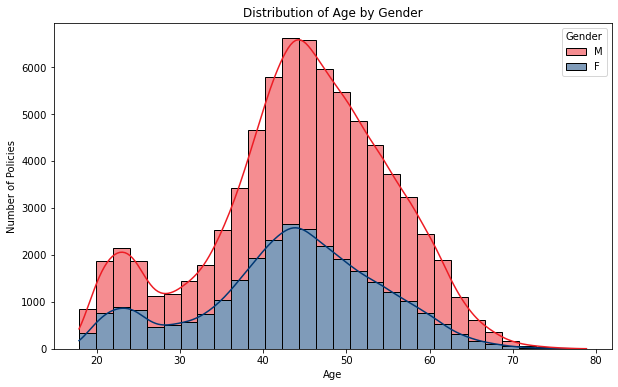

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create side-by-side histograms using seaborn
plt.figure(figsize=(10, 6))
# Define colors for each gender
colors = {'M': '#ED1C24', 'F': '#003874'}

sns.histplot(data=si_df, x='Age', hue='Gender', multiple='stack', bins=30, kde=True,palette=colors)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Number of Policies')
plt.title('Distribution of Age by Gender')

# Show the plot
plt.show()

In [15]:
si_df.groupby('Gender')[['Age','Capital','birth_yr']].describe().T

Gender                      F              M
Age      count   28450.000000   47652.000000
         mean       43.369473      45.145430
         std        10.710016      10.856501
         min        18.017796      17.891855
         25%        37.544148      39.276523
         50%        44.083504      45.864476
         75%        50.583847      52.739220
         max        76.268309      78.844627
Capital  count   28450.000000   47652.000000
         mean    87599.968822   93752.086006
         std     55820.394204   68767.704080
         min      7000.000000    7000.000000
         25%     52000.000000   55000.000000
         50%     78000.000000   80000.000000
         75%    110000.000000  115000.000000
         max   1251000.000000 3010000.000000
birth_yr count   28450.000000   47652.000000
         mean     1965.641371    1963.859838
         std        10.698830      10.847094
         min      1933.000000    1930.000000
         25%      1958.000000    1956.000000
         50%      1965.000000    1963.000000
         75%      1971.000000    1970.000000
         max      1991.000000    1991.000000

In [17]:
si_df.groupby(['seasonal_quarter','Gender'])[['Age','Capital']].describe().T

seasonal_quarter         Autumn                        Spring                 \
Gender                        F              M              F              M   
Age     count       8257.000000   13611.000000    7108.000000   11915.000000   
        mean          44.067129      45.830371      43.274137      45.133708   
        std           10.404539      10.554762      10.698541      10.770878   
        min           18.672142      18.425736      18.023272      17.938398   
        25%           38.335387      39.958932      37.354552      39.394935   
        50%           44.747433      46.513347      43.945243      45.686516   
        75%           50.965092      53.260780      50.587953      52.640657   
        max           75.904175      77.941136      74.431212      76.229979   
Capital count       8257.000000   13611.000000    7108.000000   11915.000000   
        mean       85527.635351   91755.015908   87882.116172   95095.151954   
        std        54439.488445   68805.160248   54804.831041   73327.560681   
        min         7000.000000    7000.000000    8000.000000    7000.000000   
        25%        50000.000000   52000.000000   54000.000000   55000.000000   
        50%        75000.000000   80000.000000   80000.000000   80000.000000   
        75%       110000.000000  110000.000000  110000.000000  115000.000000   
        max      1060000.000000 2005000.000000 1052000.000000 3010000.000000   

seasonal_quarter        Summer                        Winter                 
Gender                       F              M              F              M  
Age     count      5590.000000    9298.000000    7495.000000   12828.000000  
        mean         43.183058      44.970030      42.830336      44.556701  
        std          11.034305      11.105168      10.768876      11.029101  
        min          18.417522      17.971253      18.017796      17.891855  
        25%          37.145106      38.963039      37.117043      38.619439  
        50%          43.900068      45.754962      43.553730      45.348392  
        75%          50.710472      52.928816      50.049281      52.132101  
        max          76.268309      78.844627      75.279945      76.281999  
Capital count      5590.000000    9298.000000    7495.000000   12828.000000  
        mean      87383.568676   93981.549433   89776.810842   94457.257456  
        std       53914.753895   63791.472654   59479.623121   67782.648610  
        min        7000.000000    7000.000000    7000.000000    7000.000000  
        25%       52000.000000   55000.000000   55000.000000   55000.000000  
        50%       78000.000000   80775.810000   80000.000000   81350.000000  
        75%      110000.000000  115000.000000  110000.000000  115000.000000  
        max      725000.000000 1102727.000000 1251000.000000 1510000.000000

In [18]:
# creating seperate data frames
si_M=index=si_df[si_df['Gender'] == 'M']
si_F=index=si_df[si_df['Gender'] == 'F']

--- 
#### seasonal_quarter wise policy renewal distribution

In [19]:
si_M['seasonal_quarter'].value_counts()

Autumn    13611
Winter    12828
Spring    11915
Summer     9298
Name: seasonal_quarter, dtype: int64

In [20]:
si_F['seasonal_quarter'].value_counts()

Autumn    8257
Winter    7495
Spring    7108
Summer    5590
Name: seasonal_quarter, dtype: int64

---
+ Null Hypothesis (H0): The observed frequencies of the categories are consistent with the expected frequencies; there is no significant difference.
+ Alternative Hypothesis (H1): The observed frequencies differ significantly from the expected frequencies; there is a significant difference.

In [21]:
def chi2_gf(observed_frequencies):
    '''
    chi square goodness of test
    '''
    
    from scipy.stats import chisquare
    # Calculate expected frequencies assuming a uniform distribution
    expected_frequencies = np.full_like(observed_frequencies, fill_value=np.sum(observed_frequencies) / len(observed_frequencies),dtype=float)

    # Adjust the expected frequencies to ensure exact equality with the sum of observed frequencies
    expected_frequencies += (np.sum(observed_frequencies) - np.sum(expected_frequencies)) / len(expected_frequencies)

    # Perform the chi-square goodness-of-fit test
    chi2, p = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

    # Print the results
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    if p<0.01:
        print('significant difference in the distribution of categories')
    else:
        print('no significant difference in the distribution of categories')

In [22]:
chi2_gf(si_M['seasonal_quarter'].value_counts())

Chi-square statistic: 886.313942751616
P-value: 8.233713302588186e-192
significant difference in the distribution of categories


In [23]:
chi2_gf(si_F['seasonal_quarter'].value_counts())

Chi-square statistic: 530.6450615114236
P-value: 1.0890484958146388e-114
significant difference in the distribution of categories


#### result : there is significant difference in the distribution of categories of seasonal_quarter 

--- 
#### ageing_quarter wise policy renewal distribution

In [26]:
si_M['ageing_quarter'].value_counts()

2Q    12164
3Q    11857
4Q    11832
1Q    11799
Name: ageing_quarter, dtype: int64

In [24]:
chi2_gf(si_M['ageing_quarter'].value_counts())

Chi-square statistic: 7.193318223789137
P-value: 0.0659847716585871
no significant difference in the distribution of categories


In [27]:
si_F['ageing_quarter'].value_counts()

3Q    7146
2Q    7143
1Q    7104
4Q    7057
Name: ageing_quarter, dtype: int64

In [25]:
chi2_gf(si_F['ageing_quarter'].value_counts())

Chi-square statistic: 0.7318101933216168
P-value: 0.8656975760762919
no significant difference in the distribution of categories



#### result : there is significant difference in the distribution of categories of seasonal_quarter 
---

##### the number of policies in the portfolio that, by gender, renew for each combination of aging- and seasonal-quarter.

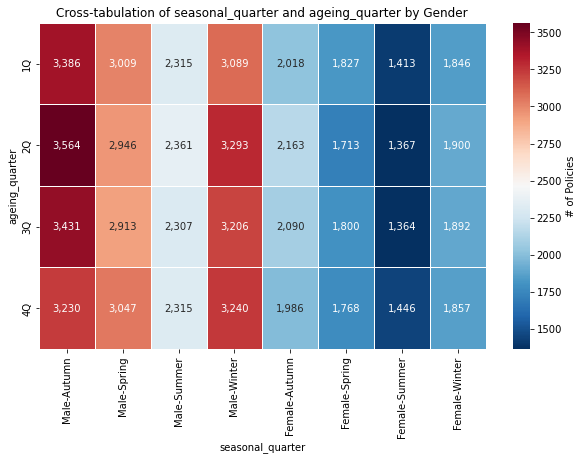

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create cross-tabulations for male and female
cross_tab_male = pd.crosstab(index=si_M['ageing_quarter'], columns=si_M['seasonal_quarter'])
cross_tab_female = pd.crosstab(index=si_F['ageing_quarter'], columns=si_F['seasonal_quarter'])

# Combine the cross-tabulations for visualization
combined_cross_tab = pd.concat([cross_tab_male, cross_tab_female], keys=['Male', 'Female'], axis=1)

# Calculate percentages
combined_cross_tab_percentage = combined_cross_tab.div(combined_cross_tab.sum(axis=1), axis=0) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn
sns.heatmap(combined_cross_tab,annot=True, fmt=",.0f", cmap="RdBu_r", cbar_kws={'label': '# of Policies'},linewidths=.5)

# Set plot labels and title
plt.xlabel('seasonal_quarter')
plt.ylabel('ageing_quarter')
plt.title('Cross-tabulation of seasonal_quarter and ageing_quarter by Gender',loc='center')

# Show the plot
plt.show()

In [33]:
combined_cross_tab

Male                      Female                     
seasonal_quarter Autumn Spring Summer Winter Autumn Spring Summer Winter
ageing_quarter                                                          
1Q                 3386   3009   2315   3089   2018   1827   1413   1846
2Q                 3564   2946   2361   3293   2163   1713   1367   1900
3Q                 3431   2913   2307   3206   2090   1800   1364   1892
4Q                 3230   3047   2315   3240   1986   1768   1446   1857

In [ ]:
# highest number of renewal in Autumn and winter Season; summer has less number of renewals 

In [35]:
from scipy.stats import chi2_contingency

In [36]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab_male)
# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 20.98490303060781
P-value: 0.012717622869832778
Degrees of freedom: 9
Expected frequencies:
[[3370.18779904 2950.24521531 2302.25598086 3176.31100478]
 [3474.44396877 3041.51053471 2373.4758667  3274.56962982]
 [3386.75453286 2964.74764963 2313.57311341 3191.9247041 ]
 [3379.61369932 2958.49660035 2308.69503903 3185.19466129]]


In [37]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab_female)
# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 16.79872979088391
P-value: 0.05196273507480148
Degrees of freedom: 9
Expected frequencies:
[[2061.783058   1774.87634446 1395.82987698 1871.51072056]
 [2073.10196837 1784.62017575 1403.49279438 1881.78506151]
 [2073.97265378 1785.36970123 1404.08224956 1882.57539543]
 [2048.14231986 1763.13377856 1386.59507909 1859.1288225 ]]


---